<a href="https://colab.research.google.com/github/GabrielYYM/Classificao-de-Cogumelos-SVM/blob/main/ClassificacaoComSVM_Grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
import seaborn as sns

RANDOM_STATE = 42

# 1. Carregar o dataset

In [ ]:
#load dataset
file_path = "mushroom_s5_cap_all_ohe.csv"
df = pd.read_csv(file_path)
print("Formato do dataset:", df.shape)
print(df.head())

Formato do dataset: (8124, 21)
   cap-shape__b  cap-shape__c  cap-shape__f  cap-shape__k  cap-shape__s  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   cap-shape__x  cap-surface__f  cap-surface__g  cap-surface__s  \
0           1.0             0.0             0.0             1.0   
1           1.0             0.0             0.0             1.0   
2           0.0             0.0             0.0             1.0   
3           1.0             0.0             0.0             0.0   
4           1.0             0.0             0.0             1.0   

   cap-surface__y  ...  cap-color__c  cap-color__e  cap-color__g  \
0             0.0  ...           0.0           

# 2. Separar features (X) e target (y)

In [ ]:
X = df.drop("class", axis=1)
y = df["class"]

# Dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 , random_state=RANDOM_STATE, stratify=y
)
print(X, y)

      cap-shape__b  cap-shape__c  cap-shape__f  cap-shape__k  cap-shape__s  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              1.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
8119           0.0           0.0           0.0           1.0           0.0   
8120           0.0           0.0           0.0           0.0           0.0   
8121           0.0           0.0           1.0           0.0           0.0   
8122           0.0           0.0           0.0           1.0           0.0   
8123           0.0           0.0           0.0           0.0           0.0   

      cap-shape__x  cap-surface__f  cap-surface__g  cap-surface

# 3. Definir grade de hiperparâmetros

In [ ]:
k = StratifiedKFold(n_splits=10, shuffle=True, random_state=43)
param_grid = {
#    "C": [0.01, 0.1, 1, 50, 100],
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],
#    "gamma": ["scale", "auto", 0.01, 0.001, 0.0001],
#    "degree": [2, 3, 4]
    "C": [0.01, 0.1, 1],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"],
}

# Criar o modelo SVM
svm = SVC()

# Configurar o GridSearchCV com cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=k, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


# 4. Avaliação do modelo

In [ ]:
# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia no teste: {acc:.3f}")

# Relatório de classificação
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia no teste: 0.716

Relatório de classificação:
               precision    recall  f1-score   support

           e       0.71      0.77      0.74       842
           p       0.73      0.66      0.69       783

    accuracy                           0.72      1625
   macro avg       0.72      0.71      0.71      1625
weighted avg       0.72      0.72      0.71      1625



# 5. Matriz de confusão

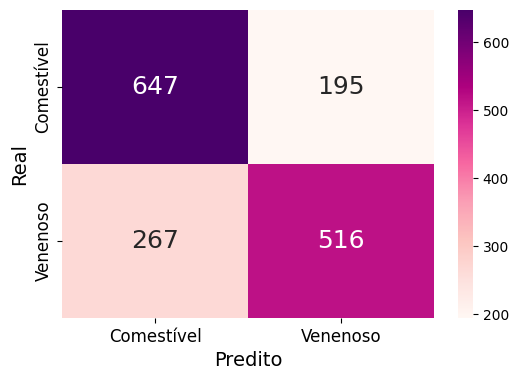

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"],
            annot_kws={"fontsize": 18})
plt.xlabel("Predito", fontsize=14)
plt.ylabel("Real", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()